------------------------------------------------------------------------------------------------------------------------------------------------------

## EVENT DISPLAY NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

Welcome to JupyROOT 6.28/00
You have latex installed!. Applying default configuration (tex=True)


## INTERACTIVE MODE

In [7]:
%run ../macros/0UVisEvent.py

## STATIC MODE


In [3]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [4]:
info           = read_input_file("TUTORIAL") # Read input file
calib_runs     = [ 1]                        # Calibration runs
laser_runs     = [ 9]                        # Laser runs
alpha_runs     = [25]                        # Alpha runs
muons_runs     = [29]                        # Muons runs
noise_runs     = [128]                       # Noise runs

channels = [0,6]

In [5]:
my_runs_calib = load_npy(np.asarray(calib_runs).astype(int),np.asarray(channels).astype(int),preset="RAW",info=info,compressed=True)
# my_runs_laser = load_npy(np.asarray(laser_runs).astype(int),np.asarray(channels).astype(int),preset="RAW",info=info,compressed=True)
# my_runs_alpha = load_npy(np.asarray(alpha_runs).astype(int),np.asarray(channels).astype(int),preset="RAW",info=info,compressed=True)
# my_runs_muons = load_npy(np.asarray(muons_runs).astype(int),np.asarray(channels).astype(int),preset="RAW",info=info,compressed=True)
# my_runs_noise = load_npy(np.asarray(noise_runs).astype(int),np.asarray(channels).astype(int),preset="RAW",info=info,compressed=True)

load_npy --> DONE!

load_npy --> DONE!



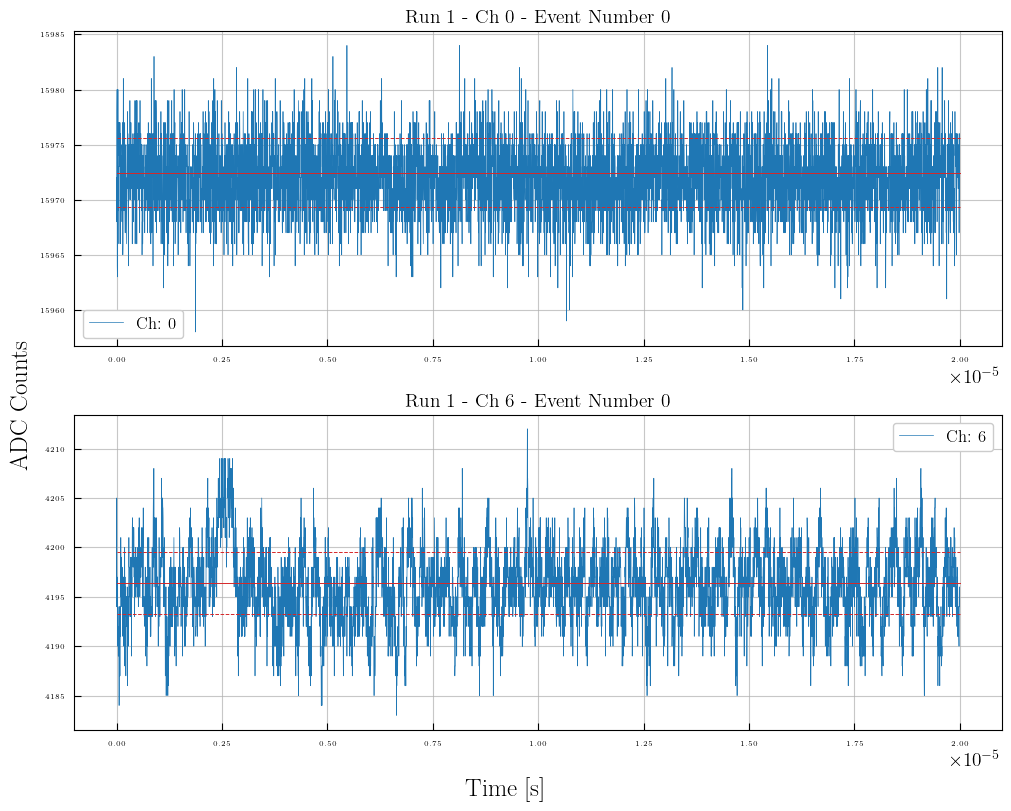

In [6]:
RUN2PLOT = "Calibration"; EVENT2PLOT = 0;

# my_runs = {"Calibration":my_runs_calib[calib_runs[0]], "Alpha": my_runs_alpha[alpha_runs[0]], "Laser": my_runs_laser[laser_runs[0]], "Muons": my_runs_muons[muons_runs[0]], "Noise": my_runs_noise[noise_runs[0]]}
my_runs = {"Calibration":my_runs_calib[calib_runs[0]]}

nch=len(channels); ncol=int((nch+1)/2); nrow=int((nch)/2); z=0; axs = []

if nch < 4: 
        fig, ax = plt.subplots(nch ,1, figsize = (10,8))
        axs = ax.T.flatten(); 
        if nch == 1: axs.append(ax)
        else: axs = ax
else: fig, ax = plt.subplots(dpi=200,ncols= ncol,nrows=nrow,figsize=[8,3],sharex=True)
for c,ch in enumerate(channels):
        i = int(z/ncol)
        j = z%ncol
        # nbin = my_runs[RUN2PLOT][ch]["NBinsWvf"]
        time = np.arange(len(my_runs[RUN2PLOT][ch]["RawADC"][EVENT2PLOT]))*my_runs[RUN2PLOT][ch]["Sampling"]
        RawADC  = my_runs[RUN2PLOT][ch]["RawADC"][EVENT2PLOT]
        PedSTD  = my_runs[RUN2PLOT][ch]["RawPedSTD"][EVENT2PLOT]
        PedMean = my_runs[RUN2PLOT][ch]["RawPedMean"][EVENT2PLOT]
        ax[c].tick_params(axis='both', which='major', labelsize=5)
        ax[c].grid()
        ax[c].plot( time,  RawADC,linewidth=.5, label="Ch: "+str(ch))
        ax[c].plot([0, time[-1]], [PedMean,PedMean],                   color="tab:red"  ,linewidth=.7)
        ax[c].plot([0, time[-1]], [PedMean+PedSTD,PedMean+PedSTD],"--",color="tab:red"  ,linewidth=.7)
        ax[c].plot([0, time[-1]], [PedMean-PedSTD,PedMean-PedSTD],"--",color="tab:red"  ,linewidth=.7)
        ax[c].legend()  
        ax[c].set_title("Run {} - Ch {} - Event Number {}".format(calib_runs[0],ch,EVENT2PLOT),size = 14)
        ax[c].xaxis.offsetText.set_fontsize(14) # Smaller fontsize for scientific notation
        ax[c].grid(True, alpha = 0.7)

        del RawADC,PedSTD,PedMean
        z+=1;   

fig.supylabel("ADC Counts")
fig.supxlabel(r'Time [s]')
# fig.supxlabel(r'Time [$\mu$s]')

plt.show()
